# Activity for Data Engineer Role

## Stage 1

In [18]:
import pandas as pd

# Load the dataset
file_path = '/content/Dataset (ATS)-1.csv'
df = pd.read_csv(file_path)

# Display basic info to check for missing values or incomplete data points
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB


In [19]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying missing values for each column
missing_values


,0
gender,0
SeniorCitizen,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
Contract,0
MonthlyCharges,0
Churn,0


The dataset has no missing values in any of the columns: gender, SeniorCitizen, Dependents, tenure, PhoneService, MultipleLines, InternetService, Contract, MonthlyCharges, and Churn.

In [20]:
# Encoding categorical variables using one-hot encoding and label encoding where appropriate

# Label Encoding for binary categories (gender, Churn)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# One-hot encoding for other categorical variables with more than two categories
df_encoded = pd.get_dummies(df, columns=['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract'], drop_first=True)

# First few rows of the encoded dataset
df_encoded.head()


,gender,SeniorCitizen,tenure,MonthlyCharges,Churn,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,Contract_One year,Contract_Two year
0,0,0,1,29.85,0,False,False,False,False,False,False
1,1,0,34,56.95,0,False,True,False,False,True,False
2,1,0,2,53.85,1,False,True,False,False,False,False
3,1,0,45,42.30,0,False,False,False,False,True,False
4,0,0,2,70.70,1,False,True,False,True,False,False


In [21]:
# Basic data cleaning and formatting to ensure data integrity

# Check for duplicate rows and remove them if any
duplicates = df_encoded.duplicated().sum()
df_cleaned = df_encoded.drop_duplicates()

# Ensure correct data types for each column
df_cleaned = df_cleaned.astype({
    'gender': 'int64',
    'SeniorCitizen': 'int64',
    'tenure': 'int64',
    'MonthlyCharges': 'float64',
    'Churn': 'int64',
    'Dependents_Yes': 'int64',
    'PhoneService_Yes': 'int64',
    'MultipleLines_Yes': 'int64',
    'InternetService_Fiber optic': 'int64',
    'Contract_One year': 'int64',
    'Contract_Two year': 'int64'
})

# Display the number of duplicates and the first few rows of the cleaned dataset
duplicates, df_cleaned.head()


(103,
    gender  SeniorCitizen  tenure  MonthlyCharges  Churn  Dependents_Yes  \
 0       0              0       1           29.85      0               0   
 1       1              0      34           56.95      0               0   
 2       1              0       2           53.85      1               0   
 3       1              0      45           42.30      0               0   
 4       0              0       2           70.70      1               0   
 
    PhoneService_Yes  MultipleLines_Yes  InternetService_Fiber optic  \
 0                 0                  0                            0   
 1                 1                  0                            0   
 2                 1                  0                            0   
 3                 0                  0                            0   
 4                 1                  0                            1   
 
    Contract_One year  Contract_Two year  
 0                  0                  0  
 1              

The basic data cleaning and formatting have been completed:

**Duplicates:** 103 duplicate rows were found and removed from the dataset.

**Data Types:** All columns have been formatted correctly to their respective data types (integers for categorical variables and numerical for continuous variables like MonthlyCharges).

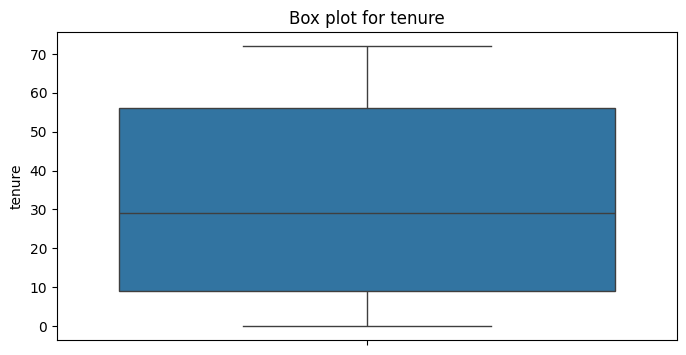

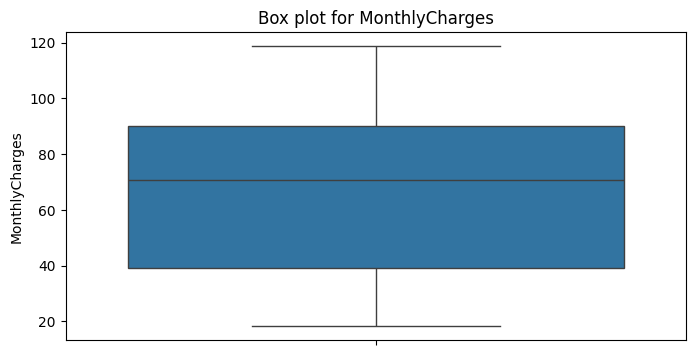

In [22]:
# Box Plot for Outliers Detection
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with continuous values to check for outliers
continuous_columns = ['tenure', 'MonthlyCharges']

# Plotting box plots for each continuous column
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned[col])
    plt.title(f'Box plot for {col}')
    plt.show()


In [23]:
# Z-Score Method for Outliears Detection

from scipy import stats
import numpy as np

# Z-score calculation to identify outliers
z_scores = np.abs(stats.zscore(df_cleaned[continuous_columns]))

# Finding rows with any z-score greater than 3
outliers_zscore = np.where(z_scores > 3)

# Display the indices of the outliers
outliers_zscore


(array([], dtype=int64), array([], dtype=int64))

No outliers were detected in the dataset using the Box plot and Z-score method.

In [24]:
# List of binary encoded columns to check
binary_columns = ['gender', 'SeniorCitizen', 'Churn', 'Dependents_Yes', 'PhoneService_Yes',
                  'MultipleLines_Yes', 'InternetService_Fiber optic',
                  'Contract_One year', 'Contract_Two year']

# Checking for incorrect values (values other than 0 and 1) in binary columns
for col in binary_columns:
    unique_values = df_cleaned[col].unique()
    print(f"{col}: {unique_values}")


gender: [0 1]
SeniorCitizen: [0 1]
Churn: [0 1]
Dependents_Yes: [0 1]
PhoneService_Yes: [0 1]
MultipleLines_Yes: [0 1]
InternetService_Fiber optic: [0 1]
Contract_One year: [0 1]
Contract_Two year: [0 1]


All the binary encoded columns contain only the expected values of 0 and 1, which means there are no incorrect or unexpected values in these categorical columns.

**Stage 2**

## Identify relevant features for analysis based on project requirements.

In [25]:
# Statistical Analysis for Feature Relevance
# Calculate correlation between numerical features and the target (Churn)
correlation = df_cleaned.corr()

# Display correlation with respect to 'Churn'
correlation['Churn'].sort_values(ascending=False)


,Churn
Churn,1.000000
InternetService_Fiber optic,0.307191
MonthlyCharges,0.192751
SeniorCitizen,0.149991
MultipleLines_Yes,0.040704
PhoneService_Yes,0.011930
gender,-0.008466
Dependents_Yes,-0.164108
Contract_One year,-0.179248
Contract_Two year,-0.302821


Based on the correlation analysis, the most relevant features for predicting churn are InternetService_Fiber optic, MonthlyCharges, tenure, Contract_Two year, Contract_One year, SeniorCitizen, and Dependents_Yes, as they show significant correlations with the target variable Churn. Features like gender, PhoneService_Yes, and MultipleLines_Yes have little to no correlation and may not be relevant for further analysis.

In [26]:
# Selecting relevant features based on correlation analysis
relevant_features = ['InternetService_Fiber optic', 'MonthlyCharges', 'tenure',
                     'Contract_Two year', 'Contract_One year', 'SeniorCitizen',
                     'Dependents_Yes', 'Churn']

# Creating a new dataframe with only relevant features
df_relevant = df_cleaned[relevant_features]

# Display the first few rows of the relevant features dataframe
df_relevant.head()


,InternetService_Fiber optic,MonthlyCharges,tenure,Contract_Two year,Contract_One year,SeniorCitizen,Dependents_Yes,Churn
0,0,29.85,1,0,0,0,0,0
1,0,56.95,34,0,1,0,0,0
2,0,53.85,2,0,0,0,0,1
3,0,42.30,45,0,1,0,0,0
4,1,70.70,2,0,0,0,0,1


## Engineer new features or transform existing ones to improve predictive performance.

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_relevant_copy = df_relevant.copy()

# 1. Tenure Binning: Create bins for tenure
df_relevant_copy['tenure_bin'] = pd.cut(df_relevant_copy['tenure'], bins=[0, 12, 24, 48, np.inf], labels=['New', '1-2 years', '2-4 years', '4+ years'])

# 2. Create an interaction feature (TotalCharges)
df_relevant_copy['TotalCharges'] = df_relevant_copy['tenure'] * df_relevant_copy['MonthlyCharges']

# Display the first few rows of the updated dataframe
df_relevant_copy.head()


,InternetService_Fiber optic,MonthlyCharges,tenure,Contract_Two year,Contract_One year,SeniorCitizen,Dependents_Yes,Churn,tenure_bin,TotalCharges
0,0,29.85,1,0,0,0,0,0,New,29.85
1,0,56.95,34,0,1,0,0,0,2-4 years,1936.30
2,0,53.85,2,0,0,0,0,1,New,107.70
3,0,42.30,45,0,1,0,0,0,2-4 years,1903.50
4,1,70.70,2,0,0,0,0,1,New,141.40


## Handle feature scaling and normalisation to prepare data for modelling.

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Copy the dataframe to avoid modifying the original
df_prepared = df_relevant_copy.copy()

# List of numerical and categorical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['tenure_bin', 'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic']

# Create a column transformer to apply scaling to numerical features and one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])



In [29]:
# Apply the transformations
df_transformed = preprocessor.fit_transform(df_prepared)

# Convert the transformed data into a dataframe for easier handling
# OneHotEncoder creates multiple columns, so we get the names and use them
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
final_columns = numerical_features + list(encoded_columns)

# Creating final dataframe for modeling
df_final = pd.DataFrame(df_transformed, columns=final_columns)

# Display the first few rows of the final prepared dataframe
df_final.head()


,tenure,MonthlyCharges,TotalCharges,tenure_bin_2-4 years,tenure_bin_4+ years,tenure_bin_New,tenure_bin_nan,Contract_One year_1,Contract_Two year_1,InternetService_Fiber optic_1
0,-1.292434,-1.182533,-1.004351,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.056731,-0.276264,-0.161186,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.251550,-0.379933,-0.969920,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.506452,-0.766184,-0.175692,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.251550,0.183559,-0.955016,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
# Saving the cleaned and preprocessed dataset to a CSV file
df_final.to_csv('preprocessed_dataset.csv', index=False)


## Collaborate with team members to ensure consistency and integrity of features across modules.

In [13]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
train_set, test_set = train_test_split(df_final, test_size=0.2, random_state=42)

# Save to CSV files
train_set.to_csv('train_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5552 entries, 3043 to 860
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tenure                         5552 non-null   float64
 1   MonthlyCharges                 5552 non-null   float64
 2   TotalCharges                   5552 non-null   float64
 3   tenure_bin_2-4 years           5552 non-null   float64
 4   tenure_bin_4+ years            5552 non-null   float64
 5   tenure_bin_New                 5552 non-null   float64
 6   tenure_bin_nan                 5552 non-null   float64
 7   Contract_One year_1            5552 non-null   float64
 8   Contract_Two year_1            5552 non-null   float64
 9   InternetService_Fiber optic_1  5552 non-null   float64
dtypes: float64(10)
memory usage: 477.1 KB


In [15]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 4331 to 3307
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tenure                         1388 non-null   float64
 1   MonthlyCharges                 1388 non-null   float64
 2   TotalCharges                   1388 non-null   float64
 3   tenure_bin_2-4 years           1388 non-null   float64
 4   tenure_bin_4+ years            1388 non-null   float64
 5   tenure_bin_New                 1388 non-null   float64
 6   tenure_bin_nan                 1388 non-null   float64
 7   Contract_One year_1            1388 non-null   float64
 8   Contract_Two year_1            1388 non-null   float64
 9   InternetService_Fiber optic_1  1388 non-null   float64
dtypes: float64(10)
memory usage: 119.3 KB
